In [8]:

# * 必要なライブラリのインポート

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
# * データの読み込み
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
y = iris.target

In [10]:
# * データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# * 主成分分析
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [12]:
# * 主成分事の寄与率
explained_variance = pca.explained_variance_ratio_

print("各主成分の寄与率: ")
for i, ev in enumerate(explained_variance):
    print(f"PC{i+1}: {ev:.3f}")

各主成分の寄与率: 
PC1: 0.730
PC2: 0.229
PC3: 0.037
PC4: 0.005


In [13]:
# * 主成分負荷量の計算
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=[f"PC{i+1}" for i in range(len(feature_names))], index = feature_names)

print("\n主成分負荷量: ")
print(loadings_df)


主成分負荷量: 
                        PC1       PC2       PC3       PC4
sepal length (cm)  0.521066  0.377418  0.719566 -0.261286
sepal width (cm)  -0.269347  0.923296 -0.244382  0.123510
petal length (cm)  0.580413  0.024492 -0.142126  0.801449
petal width (cm)   0.564857  0.066942 -0.634273 -0.523597


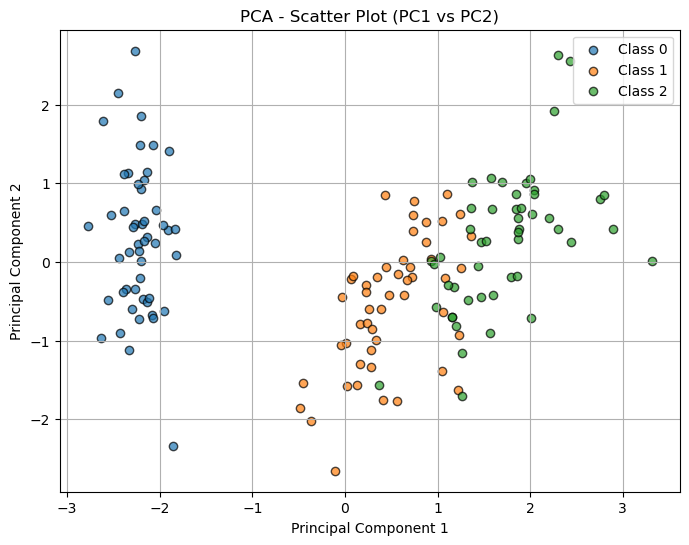

In [14]:
# * 散布図
plt.figure(figsize=(8,6))

for label, color in zip(range(3), ['r', 'g', 'b']):
    plt.scatter(
        X_pca[y == label, 0], X_pca[y == label, 1],
        label=f"Class {label}", alpha=0.7, edgecolor='k'
    )

plt.title("PCA - Scatter Plot (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()